In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url

# Q1 Acquire

In [2]:
url = get_db_url('mall_customers')

In [3]:
mall_query = '''
             SELECT *
             FROM customers
             '''

In [4]:
mall_df = pd.read_sql(mall_query, url)

In [5]:
mall_df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


# Q2 Summarize

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

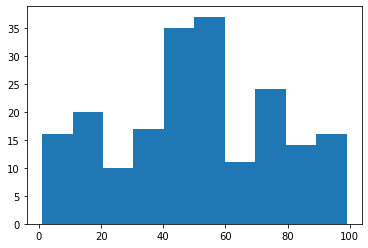

In [6]:
plt.hist(mall_df['spending_score'])

In [7]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
mall_df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

# Q3 IQR

In [9]:
mall_df['age'].quantile([0.25, 0.75])

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [10]:
age_q1, age_q3 = mall_df['age'].quantile([0.25, 0.75])

In [11]:
age_iqr = age_q3 - age_q1

age_iqr

20.25

In [12]:
age_upper = age_q3 + (age_iqr * 1.5)
age_lower = age_q1 - (age_iqr * 1.5)

age_upper, age_lower

(79.375, -1.625)

In [13]:
mall_df[mall_df['age'] > age_upper]

,customer_id,gender,age,annual_income,spending_score


# Q4 split data

In [14]:
seed = 123

mall_train, test_val = train_test_split(mall_df, train_size=0.7,
                                   random_state=seed)

mall_test, mall_val = train_test_split(test_val, train_size=0.5,
                                       random_state=seed)

mall_train.shape, mall_val.shape, mall_test.shape

((140, 5), (30, 5), (30, 5))

# Q5 encode categoricals

In [15]:
pd.get_dummies(mall_train)

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
81,82,38,54,55,0,1
107,108,54,63,46,0,1
112,113,38,64,42,1,0
145,146,28,77,97,0,1
8,9,64,19,3,0,1
...,...,...,...,...,...,...
17,18,20,21,66,0,1
98,99,48,61,42,0,1
66,67,43,48,50,1,0
126,127,43,71,35,0,1


In [16]:
mall_train = pd.get_dummies(mall_train)

mall_train.drop(columns=['gender_Male'], inplace=True)

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Female
81,82,38,54,55,0
107,108,54,63,46,0
112,113,38,64,42,1
145,146,28,77,97,0
8,9,64,19,3,0


# Q6 check for missing values

In [17]:
mall_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 81 to 109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     140 non-null    int64
 1   age             140 non-null    int64
 2   annual_income   140 non-null    int64
 3   spending_score  140 non-null    int64
 4   gender_Female   140 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 5.6 KB


# Q7 scaling

In [18]:
mms = MinMaxScaler()

mall_train[['age', 'annual_income']] = mms.fit_transform(mall_train[['age',
                                                                     'annual_income']])

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Female
81,82,0.384615,0.319672,55,0
107,108,0.692308,0.393443,46,0
112,113,0.384615,0.401639,42,1
145,146,0.192308,0.508197,97,0
8,9,0.884615,0.032787,3,0
